# Motion in 1D

'''{index}Motion in 1D

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sympy import Function, Symbol, diff, dsolve, pprint, integrate
from matplotlib import animation, rc
from IPython.display import HTML

## Position, velocity, and acceleration

The position of a body as a function of time, denoted by $x(t)$, is relative to some arbitrary chosen origin where x=0.

Velocity $v(t)$ is a measure of how rapidly and the direction which the position of the body is changing:

$$v=\frac{\Delta x}{\Delta t}=\frac{x(t+\Delta t)-x(t)}{\Delta t}$$

As $\Delta t\to 0$:

$$v=\frac{dx}{dt}$$

Acceleration $a(t)$ is a measure of how fast and in which direction the velocity is changing:

$$a=\frac{\Delta v}{\Delta t}=\frac{v(t+\Delta t)-v(t)}{\Delta t}$$

As $\Delta t\to 0$:

$$a=\frac{dv}{dt}=\frac{d^2x}{dt^2}$$

## Force

A force is <b>any interaction that changes the motion of an object</b>. This is encapsulated by Newton's first and second law of motion.

<b>Newton's first law of motion</b> states that a body continues to move at the same velocity if not acted upon by external forces. This concept is referred to as intertia, the tendency of a body to maintain its motion when no net force acts on that body.

<b>Newton's second law of motion</b> states that the acceleration of a body is proportional to the net force acting on that body, and inversely proportional to the mass of that body. In other words:

$$F=ma$$

From this, the unit of force in SI units is $kgms^{-2}$, which is defined as Newton ($N$).

Forces are broadly classified into <b>contact forces</b>, which involves physical contact between bodies, and <b>non-contact forces</b>, which can act at a distance. Therefore, pulling a rope is a contact force, whereas magnetism is a non-contact force.

### Gravity

Gravitational force is a non-contact, attractive force that acts between any pair of bodies with mass. It is proportional to the mass of each body, inversely proportional to the square of the distance between the centre of those bodies, and acts in a direction that aligns with a straight line connecting the centre of the bodies. Mathematically:

$$F=\frac{Gm_am_b}{R_{ab}^2}$$

where $m_a$ is the mass of body A, $m_b$ is the mass of body B, $R_{ab}$ is the distance between the two bodies, and G is the gravitational constant equal to $6.674*10^{-11}m^3kg^{-1}s^{-2}$.

The force acting upon a body of unit mass m by the Earth with mass $5.972\times10^{24}kg$ and radius $6.371\times10^3m$ is:

$$F=\frac{m(5.972\times10^{24})(6.674\times10^{-11})}{(6.371\times10^3)^2}=9.8m=mg$$

where $g=9.8ms^{-2}$, or acceleration due to gravity.

### Falling objects

Considering objects free-falling solely under gravity:

$$\frac{d^2x}{dt^2}=-g$$

$$\frac{dx}{dt}=v=v_0-gt$$

$$x=x_0+v_0t-\frac{1}{2}gt^2$$

where $x_0$ and $v_0$ are initial position and initial velocity respectively.

## Tutorial Problem 1.2

If a rock were ejected from a volcano at an initial speed of 200m/s, what would be the maximum height that it reaches above the top of the volcano? And how long will it take to reach that height?

In [3]:
def x(x0, v0, t, g=9.81):
    return x0 + v0*t - g*t**2/2 

time = np.arange(0, 40.8, 0.1)

x0 = 0 # initial position
v0 = 200 # initial velocity

position = x(x0, v0, time)
    
print("Max height reached = %.f m" % (max(position))) 
result = np.where(position == max(position)) # find index of maximum position
print("Time needed for the body to reach that height = %.2fs" % (time[result[0][0]]))

Max height reached = 2039 m
Time needed for the body to reach that height = 20.40s


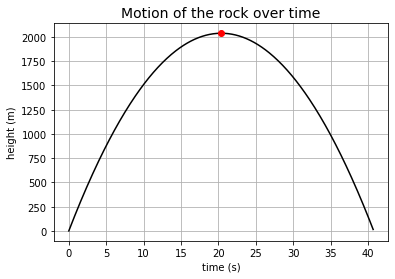

In [5]:
fig = plt.figure(figsize=(6,4))

plt.plot(time, position, 'k')
plt.plot(time[result[0][0]], max(position), 'ro')
plt.xlabel('time (s)')
plt.ylabel('height (m)')
plt.title('Motion of the rock over time', fontsize=14)
plt.grid(True)

plt.show()

### More about contact forces

Newton's third law of motion states that when two bodies interact, when a force is exerted from a body A to body B, a force equal in magnitude and opposite in direction is exerted by body B to body A. 

Therefore, on the surface of contact between two bodies, there is contact force and a <b>normal force N</b> with the same magnitude and in opposite direction to that of the contact force.

### Friction

Friction is a contact force that always acts <b>tangential</b> to the contact surface between two bodies, and acts in a direction that <b>prevents relative motion</b> between those bodies. 

The maximum friction that can be exerted is equal to $\mu_dN$ where $\mu_d$ is the coefficient of dynamic friction. If the force exerted in tangential direction is less than $\mu_dN$, friction is not overcome and there won't be relative motion.

Therefore, when tangential force $F$ is larger than $\mu_dN$, net force on the body in the tangential direction is $F-\mu_dN$.

## Tutorial Problem 1.3

Consider a stone of mass $m=24kg$ sitting on a flat valley floor, being hit by a gust of wind that exerts a horizontal force $F=5N$ on it for a period of time $T=5s$. Assuming the coefficient of friction between the rock and the ground is $\mu=0.01$, find the distance travelled by the rock before it stops sliding.

In [2]:
m = 24 # mass (kg)
F = 5 # force of wind (N)
T = 5 # time wind exert force on rock (s)
u = 0.01 # coefficient of friction
g = 9.81 # m/s2

time1 = np.arange(0., 5.01, 0.01) # time blown by wind

time2 = np.arange(0.01, 5.63, 0.01) # time before stopping

time = np.arange(0, 10.63, 0.01) # total amount of time

x = np.zeros(len(time))

v = np.zeros(len(time))

# Newton's second law to find acceleration

# a = (F-umg)/m

# x = x0 + v0t + at**2/2
x[:501] = ((F-u*m*g)*time1**2)/(2*m) # distance over time travelled when blown by wind

# v = v0 + at
v[:501] = (F-u*m*g)*time1/m # velocity over time when blown by wind

# a = -umg/m = -ug
# x0 = last element calculated in x
# v0 = last element calculated in v

# x = x0 + v0t - at**2/2
x[501:] = x[500] + v[500]*time2 - u*g*time2**2/2 # distance over time without wind

# v = v0 + at
v[501:] = v[500] - u*g*time2 # velocity over time without wind

print("Total distance travelled = %.2fm" % (x[-1]))

Total distance travelled = 2.93m


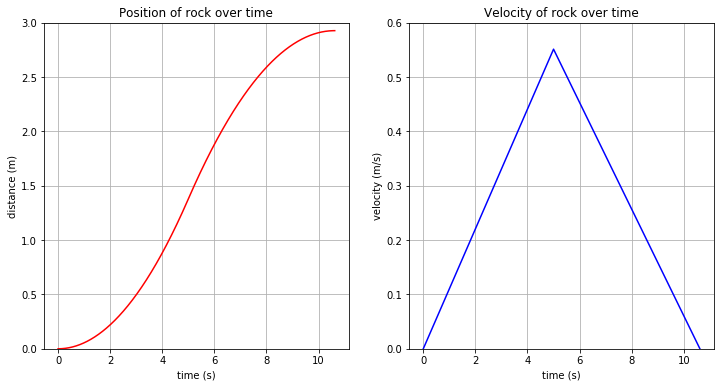

In [4]:
fig = plt.figure(figsize=(12,6))

ax1 = fig.add_subplot(121)
ax1.plot(time, x, 'r')
ax1.set_xlabel('time (s)')
ax1.set_ylabel('distance (m)')
ax1.set_ylim(0, 3)
ax1.set_title('Position of rock over time')
ax1.grid(True)

ax2 = fig.add_subplot(122)
ax2.plot(time, v, 'b')
ax2.set_xlabel('time (s)')
ax2.set_ylabel('velocity (m/s)')
ax2.set_ylim(0, 0.6)
ax2.set_title('Velocity of rock over time')
ax2.grid(True)

plt.show()

### Viscous drag force

![](images/fluid.png)

Resistance from fluid arise from its <b>viscosity</b>, and is called the viscous drag force.

For a spherical solid particle moving through a stationary fluid, or a fluid flowing past a stationary body, Stoke's law states that:

$$F=-6\pi \mu Rv$$

where $R$ is the radius of the particle, and $v$ is the relative velocity between the body and the fluid. The minus sign implies it opposes the particle's motion.

Weight of the grain $F_w$:

$$F_w=m_sg=\rho_sVg=\rho_s\frac{4}{3}\pi R^3g$$

where $m_s$ is mass of the particle, $\rho_s$ is its density, and V its volume.

Buoyancy force $F_b$ is the weight of water displaced:

$$F_b=m_wg=\rho_wVg=\rho_w\frac{4}{3}\pi R^3g$$

Accounting all these forces into Newton's second law:

$$\frac{4}{3}\pi\rho_sR^3\frac{d^2x}{dt^2}=\rho_s\frac{4}{3}\pi R^3g-\rho_w\frac{4}{3}\pi R^3g-6\pi \mu Rv$$

Rearranging this gives an ODE:

$$\rho_s\frac{dv}{dt}=(\rho_s-\rho_w)g-\frac{9}{2}\frac{\mu v}{R^2}$$

which can be solved analytically.

## Tutorial Problem 1.5

Find the terminal velocity of spherical particles with densities $\rho_s=2.65\times10^3kgm^{-3}$, and radii $10\mu m$, $100\mu m$, $1mm$, and $1cm$. 

Density of water $\rho_w=1000kgm^{-3}$, viscosity of water $\mu=10^{-3}$, and the velocity of a sphere from rest through a viscous fluid is given by:

$$v=\frac{2(\rho_s-\rho_w)gR^2}{9\mu}(1-e^{\frac{-9\mu t}{2\rho_sR^2}})$$

As $t\to \infty$, $v\to \frac{2(\rho_s-\rho_w)gR^2}{9\mu}$, which is the terminal velocity.

In [85]:
def velocity(t, R, ps=2650, pw=1000, g=9.81, u=10e-3):
    return (2*(ps-pw)*g*R**2)/(9*u) * (1-np.exp((-9*u*t)/(2*ps*R**2))) # analytical solution to ode

def t_v(radius, start, end, interval):
    t = np.arange(start, end, interval)
    v = np.zeros(len(t))
    for i in range(len(t)):
        v[i] = velocity(t[i], radius)
    return t, v # obtain list of time and velocity for particles with different radius over a time interval

t_1cm, v_1cm = t_v(1e-2, 0, 50, 0.05)
t_1mm, v_1mm = t_v(1e-3, 0, 0.5, 0.0005)
t_10um, v_10um = t_v(10e-6, 0, 1e-4, 1e-7)
t_1um, v_1um = t_v(1e-6, 0, 5e-7, 5e-10)

print("Terminal velocity of 1um grain is %.2e m/s" % (v_1um[-1]))
print("Terminal velocity of 10um grain is %.2e m/s" % (v_10um[-1]))
print("Terminal velocity of 1mm grain is %.2f m/s" % (v_1mm[-1]))
print("Terminal velocity of 1cm grain is %.2f m/s" % (v_1cm[-1]))

Terminal velocity of 1um grain is 3.60e-07 m/s
Terminal velocity of 10um grain is 3.60e-05 m/s
Terminal velocity of 1mm grain is 0.36 m/s
Terminal velocity of 1cm grain is 35.96 m/s


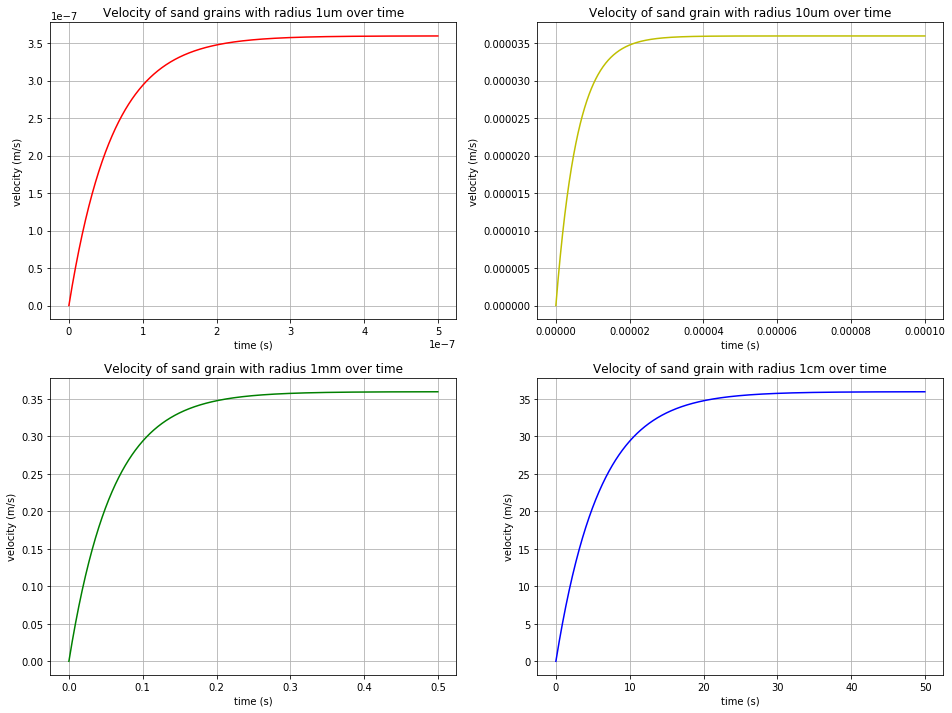

In [86]:
fig = plt.figure(figsize=(16,12))

ax1 = fig.add_subplot(221)
ax1.plot(t_1um, v_1um, 'r')
ax1.set_xlabel('time (s)')
ax1.set_ylabel('velocity (m/s)')
ax1.set_title('Velocity of sand grains with radius 1um over time')
ax1.grid(True)

ax2 = fig.add_subplot(222)
ax2.plot(t_10um, v_10um, 'y')
ax2.set_xlabel('time (s)')
ax2.set_ylabel('velocity (m/s)')
ax2.set_title('Velocity of sand grain with radius 10um over time')
ax2.grid(True)

ax3 = fig.add_subplot(223)
ax3.plot(t_1mm, v_1mm, 'g')
ax3.set_xlabel('time (s)')
ax3.set_ylabel('velocity (m/s)')
ax3.set_title('Velocity of sand grain with radius 1mm over time')
ax3.grid(True)

ax4 = fig.add_subplot(224)
ax4.plot(t_1cm, v_1cm, 'b')
ax4.set_xlabel('time (s)')
ax4.set_ylabel('velocity (m/s)')
ax4.set_title('Velocity of sand grain with radius 1cm over time')
ax4.grid(True)

plt.show()

### Elastic Spring Forces

According to Hooke's law, the force applied to the spring $F$ is directly proportional to its extension $x$. Mathematically:

$$F=kx$$

where k is the spring constant in $Nm^{-1}$.

#### Coupled Oscillators

Consider two masses, $m_1$ and $m_2$, connected by a spring with spring constant $k$. Let the position of $m_1$ be $x_1$, and the position of $m_2$ be $x_2$.

From this, the length of the spring is ($x_2-x_1$), and the change in length is $\Delta(x_2-x_1)=\Delta x_2-\Delta x_1$.

Applying Hooke's law into Newton's second law to $m_1$:

$$k(\Delta x_2-\Delta x_1)=m_1\frac{d^2x_1}{dt^2}$$

Applying the same laws for $m_2$, and considering Newton's third law:

$$-k(\Delta x_2-\Delta x_1)=m_2\frac{d^2x_2}{dt^2}$$

These two equations are coupled and must be solved simultaneously.

## Tutorial Problem 1.6

![](images/problem1_6.png)

The oscillatory solutions to thie problem are of the form $x_1=A_1e^{i\omega t}$, $x_2=A_2e^{i\omega t}$. Substitute these expressions into the coupled equations, and solve the eigenvalue problem, finding the two values of $\omega$ which are the eigenvalues, and the ratio $\frac{A_2}{A_1}$ that corresponds to each eigenvalue.

Discuss your results.

Hint: solving the problem analytically, you should obtain the following:

When $\omega_1=0$, $A_1=A_2$

When $\omega_2=\sqrt{\frac{2k}{m}}$, $A_1=-A_2$

In [5]:
import cmath

w = np.pi

t = np.arange(0, 2*np.pi, 0.01)
X1 = np.zeros(len(t))
X2 = np.zeros(len(t))
X3 = np.zeros(len(t))
X4 = np.zeros(len(t))

for i in range(len(t)):
    # w1 = 0
    # A1 = A2
    z1 = cmath.exp(1j*w*t[i])+1
    X1[i] = z1.real
    z2 = cmath.exp(1j*w*t[i])-1
    X2[i] = z2.real
    
    # w2 = (2k/m)**0.5
    # A1 = -A2
    z3 = cmath.exp(1j*w*t[i])+1
    X3[i] = z3.real
    z4 = -(cmath.exp(1j*w*t[i]))-1
    X4[i] = z4.real

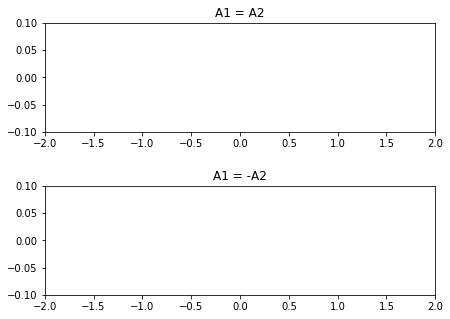

In [6]:
nframes = len(t)


# Plot background axes
fig, axes = plt.subplots(2,1, figsize=(7,5))


line1, = axes[0].plot([], [], 'ro', lw=2)
line2, = axes[0].plot([], [], 'go', lw=2)
line3, = axes[1].plot([], [], 'yo', lw=2)
line4, = axes[1].plot([], [], 'bo', lw=2)

for ax in axes:
    ax.set_xlim(-2,2)
    ax.set_ylim(-0.1,0.1)
    
axes[0].set_title('A1 = A2')
axes[1].set_title('A1 = -A2')
    

    
lines = [line1, line2, line3, line4]
    
plt.subplots_adjust(hspace=0.5)

# Plot background for each frame
def init():
    for line in lines:
        line.set_data([], [])
    return lines

# Set what data to plot in each frame
def animate(i):
    
    x1 = X1[i]
    y1 = 0
    lines[0].set_data(x1, y1)
    
    x2 = X2[i]
    y2 = 0
    lines[1].set_data(x2, y2)
    
    x3 = X3[i]
    y3=0
    lines[2].set_data(x3, y3)
    
    x4 = X4[i]
    y4 = 0
    lines[3].set_data(x4, y4)
    
    return lines

# Call the animator
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=nframes, interval=10, blit=True)

In [7]:
HTML(anim.to_html5_video())

### References

Course notes from Lecture 1 of the module ESE 95011 Mechanics